In [1]:
import pandas as pd
import numpy as np

In [6]:
# data loading
data = pd.read_excel('data_tbv.xlsx')
data.head()

,age,sex,province,req_date,is_bad,enc_id,enc_phone,mstcty,mst_encrypt,ngay_lap_re,...,biztime_monthly_calldayno_t12,biztime_monthly_callduration_t12,biztime_monthly_avgcallduration_t12,biztime_monthly_stdcallduration_t12,nighttime_monthly_nocontact_t12,nighttime_monthly_callno_t12,nighttime_monthly_calldayno_t12,nighttime_monthly_callduration_t12,nighttime_monthly_avgcallduration_t12,nighttime_monthly_stdcallduration_t12
0,40,Male,Đồng Tháp,2019-09-09,1,qbmB2FDS/T9dbZVD/b33wg==,AqDUrRqQB5VWNeCEjWz1xA==,AlcWPA988/SiJ6VzK0Y80Q==,NaN,2017-03-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32,Male,Hà Nội,2019-09-09,1,sKGZAxhjyO0nxQ9CrlZbSw==,X7sxKRS6+JpqHwBCxplySQ==,e2i08DAYVh3Ak1Tc1uGOeQ==,yJF35ZaZMOyKAlpmRy8+gQ==,2019-03-28,...,9.0,350.0,18.421053,12.125803,NaN,NaN,NaN,NaN,NaN,NaN
2,32,Male,Hà Nội,2019-09-09,1,Lert87J0SCGfce6PBkv0+w==,jJFZhFarLQ2XhQMRUYtwDg==,IMkcueFODYw8yBeIcrjfWw==,tl7HluUE2SMAxYKzUrAxfg==,2019-04-01,...,26.0,32849.0,23.977372,22.093273,12.0,22.0,12.0,2561.0,116.409091,163.256345
3,32,Female,Hà Nội,2019-09-09,1,SbtEwTlwz6kOJtnjtxDZ7A==,0Bol+Ib1xGA8xQUqb43Uyg==,9GTjGMqAROx0QDqSwSNRuw==,cTHkX9GiFDiX+gGjBjbcvQ==,2015-04-17,...,28.0,13066.0,123.264151,245.821240,1.0,3.0,1.0,234.0,78.000000,44.136153
4,32,Male,Phú Thọ,2019-09-08,1,gyoBkm/XqdHcd0hl5NScQw==,S9kop0jGn49mxYh+Sst1uQ==,Eq7QA7qXbUj0MSCIxQ5pZA==,0bMQgBJeWrfKNgQb68SJ+w==,2018-03-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
'kich_hoat' in data.columns

True

In [8]:
# calculate time active for phone number
data.kich_hoat = pd.to_datetime(data.kich_hoat.astype(str), format='%Y%m%d')
data['mobileno_timeactive'] = (data.req_date - data.kich_hoat)/np.timedelta64(1,'D')

# com_activeyear
data['com_startyear'].replace({0: np.nan}, inplace=True)
data['com_taxyear'].replace({0: np.nan}, inplace=True)
data['com_activeyear'] = data.req_date.apply(lambda x: x.year) - data.com_startyear
data['com_taxingyear'] = data.req_date.apply(lambda x: x.year) - data.com_taxyear

data.loc[data.com_activeyear < 0,'com_activeyear'] = np.nan
data.loc[data.com_taxingyear < 0,'com_taxingyear'] = np.nan


print(data.shape)
redundant_cols = ['enc_id','enc_phone','mstcty','mst_encrypt','msisdn','req_date','ngay_lap_re','app_year','tax_year',
                  'owner_card_issu','owner_regi_date','kich_hoat','com_startyear','com_taxyear','com_active']
data.drop(columns=redundant_cols, inplace=True)
print(data.shape)

(24484, 331)
(24484, 316)


In [9]:
# take records with last updated tax within 1 year prior to request date
data = data[data.t_year <= 1]
data.shape

(22080, 316)

In [10]:
# count_missing
missing_thres = 0.25
missing_percent = (data.isna().sum()/data.shape[0])
missing_percent.head()
varlist = missing_percent[missing_percent <= missing_thres].index.tolist()
varlist

['age',
 'sex',
 'province',
 'is_bad',
 't_year',
 't_month',
 'tongthunhap_y1',
 'taxemployer_1y',
 'taxemployer_2y',
 'nodeclaration_y1',
 'no_dependon',
 'com_business',
 'com_size',
 'com_province',
 'quan_huyen',
 'tinh_thanh_pho',
 'acc_type',
 'tong_tien_t1',
 'tien_cam_ket_va_vas_t1',
 'tien_cuoc_goi_t1',
 'tien_cuoc_tin_nhan_t1',
 'so_giay_goi_t1',
 'so_tin_nhan_t1',
 'tong_tien_t2',
 'tien_cam_ket_va_vas_t2',
 'tien_cuoc_goi_t2',
 'tien_cuoc_tin_nhan_t2',
 'so_giay_goi_t2',
 'so_tin_nhan_t2',
 'overall_monthly_nocontact_t3',
 'overall_monthly_callno_t3',
 'overall_monthly_calldayno_t3',
 'overall_monthly_callduration_t3',
 'overall_monthly_avgcallduration_t3',
 'overall_monthly_stdcallduration_t3',
 'biztime_monthly_nocontact_t3',
 'biztime_monthly_callno_t3',
 'biztime_monthly_calldayno_t3',
 'biztime_monthly_callduration_t3',
 'biztime_monthly_avgcallduration_t3',
 'biztime_monthly_stdcallduration_t3',
 'mobileno_timeactive',
 'com_activeyear',
 'com_taxingyear']

In [271]:
data = data[varlist]
data.to_csv('data_filtermissing.csv', index=None)
data[varlist].isna().sum()

age                                      0
sex                                      0
province                                 0
is_bad                                   0
t_year                                   0
t_month                                  0
tongthunhap_y1                        3861
taxemployer_1y                           0
taxemployer_2y                           0
nodeclaration_y1                      3861
no_dependon                            582
com_business                           689
com_size                               552
com_province                           552
quan_huyen                               0
tinh_thanh_pho                           0
acc_type                                 0
tong_tien_t1                             0
tien_cam_ket_va_vas_t1                   0
tien_cuoc_goi_t1                         0
tien_cuoc_tin_nhan_t1                    0
so_giay_goi_t1                           0
so_tin_nhan_t1                           0
tong_tien_t

In [272]:
# impute missing value
def impute_missing(input_data):
    data = input_data
    # group of cols replaced missing with -1
    cols1 = ['tongthunhap_y1','nodeclaration_y1','com_size','com_activeyear','com_taxingyear']
    data[cols1] = data[cols1].fillna(-1)
    
    # group of cols replaced missing with 0
    cols2 = ['no_dependon'] + varlist[-27:-3]
    data[cols2] = data[cols2].fillna(0)
    
    # group of categorical cols replaced missing value with 'missing'
    cols3 = ['com_business','com_province']
    data[cols3] = data[cols3].fillna('missing')
    
    return data
    
data = impute_missing(data)

In [323]:
data.isna().sum()

age                                   0
sex                                   0
province                              0
is_bad                                0
t_year                                0
t_month                               0
tongthunhap_y1                        0
taxemployer_1y                        0
taxemployer_2y                        0
nodeclaration_y1                      0
no_dependon                           0
com_size                              0
acc_type                              0
tong_tien_t1                          0
tien_cam_ket_va_vas_t1                0
tien_cuoc_goi_t1                      0
tien_cuoc_tin_nhan_t1                 0
so_giay_goi_t1                        0
so_tin_nhan_t1                        0
tong_tien_t2                          0
tien_cam_ket_va_vas_t2                0
tien_cuoc_goi_t2                      0
tien_cuoc_tin_nhan_t2                 0
so_giay_goi_t2                        0
so_tin_nhan_t2                        0


In [273]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [274]:
# remove "quan_huyen","com_business" 
# group tinh_thanh_pho, com_province and province into areas
import unidecode

def normalize_province(x):
    name = unidecode.unidecode(x).lower().replace(' ','')
    
    format_dict = {'hanoi':['hn','tphn','tphanoi','thanhphohanoi','hanoi','hanoi(hni1)','hanoi(hni2)'],
                   'hochiminh':['tphochiminh','tphcm','hcm','hochiminh'],
                   'daklak':['daclac','daclak','daklac','daklak'],
                   'daknong':['dacnong','daknong'],
                   'vungtau':['bariavungtau','vungtau','brvt'],
                   'vinhphuc':['vinhphu','vinhp'],
                   'thuathienhue':['hue','thuathienhue'],
                   'backan':['backan','baccan']}
    
    for k,v in format_dict.items():
        if name in v:
            return k
    
    return name
    
def determine_economic_area(x):
    map_dict = {'trung du va mien nui phia bac':['hagiang','caobang','langson','bacgiang','phutho','thainguyen','backan','tuyenquang','laocai','yenbai','laichau','sonla','dienbien','hoabinh'],
                'dong bang song hong':['hanoi','haiphong','haiduong','hungyen','vinhphuc','bacninh','thaibinh','namdinh','hanam','ninhbinh','quangninh'],
                'bac trung bo va duyen hai mien trung':['thanhhoa','nghean','hatinh','quangbinh','quangtri','thuathienhue','danang','quangnam','quangngai','binhdinh','phuyen','khanhhoa','ninhthuan','binhthuan'],
                'tay nguyen':['kontum','gialai','daklak','daknong','lamdong'],
                'dong nam bo':['hochiminh','dongnai','vungtau','binhduong','binhphuoc','tayninh'],
                'dong bang song cuu long':['cantho','longan','tiengiang','bentre','travinh','vinhlong','angiang','dongthap','kiengiang','haugiang','soctrang','baclieu','camau']}
    for k, v in map_dict.items():
        if x in v:
            return k
    return 'missing'

data['com_province'] = data['com_province'].apply(lambda x: normalize_province(x))
data['tinh_thanh_pho'] = data['tinh_thanh_pho'].apply(lambda x: normalize_province(x))
data['compare_province'] = data['com_province'] == data['tinh_thanh_pho']
data['com_area'] = data['com_province'].apply(lambda x: determine_economic_area(x))
data['telco_area'] = data['tinh_thanh_pho'].apply(lambda x: determine_economic_area(x))
data.drop(columns=['com_province','tinh_thanh_pho','quan_huyen','com_business'], inplace=True)

In [275]:
var = data.columns.tolist()
var.remove('is_bad')

In [276]:
iv_df, iv = data_vars(data[var], data.is_bad)

In [277]:
iv_thres = 0.02
picked_var = iv.loc[iv.IV > iv_thres, 'VAR_NAME'].tolist()
picked_var

['age',
 'biztime_monthly_avgcallduration_t3',
 'biztime_monthly_stdcallduration_t3',
 'com_activeyear',
 'com_area',
 'com_size',
 'com_taxingyear',
 'compare_province',
 'mobileno_timeactive',
 'no_dependon',
 'overall_monthly_avgcallduration_t3',
 'overall_monthly_stdcallduration_t3',
 'province',
 'sex',
 'telco_area',
 'tong_tien_t1',
 'tong_tien_t2',
 'tongthunhap_y1']

In [327]:
transform_dict = {}
for i in cat:
    temp_dict = {}
    temp = iv_df.loc[iv_df.VAR_NAME == i].reset_index(drop=True)
    temp['value'] = temp.apply(lambda row: pd.Interval(row.MIN_VALUE, row.MAX_VALUE, closed='both') if pd.notna(row.MIN_VALUE) and (row.MIN_VALUE != row.MAX_VALUE) else row.MIN_VALUE , axis=1)
    for j in range(temp.shape[0]):
        temp_dict[temp.loc[j, 'value']] = temp.loc[j, 'WOE']
        
    transform_dict[i] = temp_dict

In [328]:
def binning_func(x, binning_array):
    for i in binning_array:
        if isinstance(i[0], pd.Interval):
            if x in i[0]:
                return i[1]
        else:
            if x == i[0]:
                return i[1]

data_processed = pd.DataFrame()

for k, v in binning_dict.items():
    data_processed[k] = data[k].apply(lambda x: binning_func(x, v))

In [329]:
data_processed['is_bad'] = data['is_bad']

In [331]:
X = data_processed.iloc[:,:-1]
y = data_processed.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [414]:
# metric
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

#roc curve:
def roc_plot(model, X_test, y_test, plot=True):
    fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auroc = auc(fpr, tpr)
    
    if plot:
        plt.figure()
        lw = 2
        plt.plot(
            fpr,
            tpr,
            color="darkorange",
            lw=lw,
            label="ROC curve (area = %0.2f)" % auroc
        )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic example")
        plt.legend(loc="lower right")
        plt.show()

    return auroc

def class_measure(model, X_test, y_test):
    # thres set by the whole sample bad rate
    
    y_true = y_test
    y_pred = model.predict_proba(X_test)[:,1]
    
    
    percent = sum(y_true)/len(y_true)
    thres = np.percentile(y_pred, 100 - percent*100)
    y_label = np.where(y_pred >= thres, 1, 0)
    
    fpr, tpr, thres = roc_curve(y_true, y_pred)
    auroc = auc(fpr, tpr)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_label).ravel()
    accuracy = (tn + tp)/(tn+fp+fn+tp)
    sensitivity = tp/(tp+fp)
    specificity = tn/(tn+fn)
    g_measure = np.sqrt(sensitivity*specificity)
    
    return accuracy, sensitivity, specificity, g_measure, auroc

def performance_measure(model, X, y, kind='StratifiedShuffleSplit', loop_perfold=1, random_state_data=None):
    # 10-fold cross-validation
    k = 10
    # 10 shuffle split
    kf = StratifiedShuffleSplit(n_splits=k, test_size=0.1, random_state=random_state_data)
    folds = kf.split(X, y)
    
    result = []
    for train_idx, test_idx in folds:
        X_train , X_test = X.iloc[train_idx,:],X.iloc[test_idx,:]
        y_train , y_test = y.iloc[train_idx] , y.iloc[test_idx]
        
        result_ = []
        for i in range(loop_perfold):
            model.fit(X_train, y_train)   
            result_.append(list(class_measure(model, X_test, y_test)))
        result.append(np.mean(result_, axis=0))
        
    return np.mean(result, axis=0)
             
    

In [1]:
a = "I'm ready"

In [3]:
15+((4**2)*3)

63

In [420]:
performance_measure(lr, X, y, random_state_data=1000)

array([0.73369565, 0.44840525, 0.82447761, 0.60798431, 0.71821842])

In [421]:
performance_measure(rf, X, y, random_state_data=1000)

array([0.72341486, 0.42874924, 0.82005754, 0.59294571, 0.69318372])

In [422]:
performance_measure(gb, X, y, random_state_data=1000)

array([0.73967391, 0.46078799, 0.82841791, 0.61781049, 0.72628507])

In [428]:
elm = EELMClassifier(node=70, activation_func='relu')
performance_measure(elm, X, y, random_state_data=1000, loop_perfold=10)

array([0.73425725, 0.44956848, 0.82484776, 0.60891896, 0.71541525])

In [429]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from scipy.special import expit
import numpy as np

class EELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, node, activation_func, faster=None, C=None, p=None, random_state=None, 
                 bat_pop=None, f_range=None, max_iter=None, thres=None):
        # node: no. of hidden nodes in the single hidden layer
        # activation_func: activation function in ['relu','tanh','hardlim','sigmoid','new_novel']
        # faster: in [None, 1, 2], as in Faster ELM (Faster-1: training sample is not huge,
        #                                            Faster-2: training sample is huge)
        # C: regularization factor for Fasster ELM
        # p: parameter for novel activation function
        # random_state: set state for random procedure
        # bat_pop: no. of bat in population
        # f_range: frequency range
        # max_iter: no. of loop
        
        self.node = node
        self.activation_func = activation_func
        self.faster = faster
        self.C = C
        self.p = p
        self.random_state = random_state
        
        self.bat_pop = bat_pop
        self.f_range = f_range
        self.max_iter = max_iter
        self.thres = thres
        
        
        if self.activation_func not in ['relu','tanh','hardlim','sig','new_novel']:
            raise ValueError('Activation function must be one in [relu, tanh, hardlim, sig, new_novel]')
        
        if self.faster not in [None,1,2]:
            raise ValueError('Parameter faster must be one in [None, 1, 2]')
            
        if (self.faster != None) and (C == None): 
            raise ValueError('Missing regularization value C')
            
        if (self.activation_func == 'new_novel') and (self.p == None):
            raise ValueError('Missing parameter p for the new novel activation function')
            
        if self.bat_pop != None:
            if (self.f_range == None) or (self.max_iter == None):
                raise ValueError('Missing parameters for the bat algorithm')
                
    def relu(self, x):
        return np.maximum(x, 0, x)
    
    def tanh(self, x):
        return (1 - np.exp(-2*x))/(1 + np.exp(-2*x))
    
    def hardlim(self, x):
        x = np.array(x)
        return np.where(x >= 0, 1, 0)
    
    def sigmoid(self, x):
        return expit(x)
    
    def new(self, x, p):
        return x/(1 + x**(4*p-2))**(1/(4*p-2))
    
    def hidden_nodes(self, X, input_weights, biases):
        G = np.dot(X, input_weights) + biases
        if self.activation_func == 'relu':
            H = self.relu(G)
        elif self.activation_func == 'sig':
            H = self.sigmoid(G)
        elif self.activation_func == 'tanh':
            H = self.tanh(G)
        elif self.activation_func == 'hardlim':
            H = self.hardlim(G)
        elif self.activation_func == 'new':
            H = self.new(G, self.p)
            
        return H
    
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, np.ravel(y)) # make sure y is 1-d array
        # Check the unique classes seen during fit
        self.classes_ = unique_labels(y)
        self.y_ = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
        
        if self.random_state != None:
                np.random.seed(self.random_state)
        
        if self.bat_pop == None: #elm
            self.input_weights = np.random.normal(size=[X.shape[1],self.node])
            self.biases = np.random.normal(size=[self.node])

            
        else: # eelm
            dim = X.shape[1]*self.node + self.node
            self.init_bat(dim)
            
            t = 0
            while t < self.max_iter:
                thres = self.move_bat(X, y, t+1)
                if self.thres != None: # early stop criteria
                    if (thres >= 0) and (thres < self.thres):
                        break
                t += 1
            
            self.input_weights = self.x_best[:-self.node].reshape(X.shape[1], self.node)
            self.biases = self.x_best[-self.node:]
        
        
        # The smallest norm least square solution
        H = self.hidden_nodes(X, self.input_weights, self.biases)
        if self.faster == 1:
            self.output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ self.y_
        elif self.faster == 2:
            self.output_weights = np.linalg.inv(np.identity(self.node)/self.C + H.T @ H) @ H.T @ self.y_
        else:
            self.output_weights = np.dot(np.linalg.pinv(H), self.y_)
            
            
    def init_bat(self, dim):
        self.Pos = np.random.rand(self.bat_pop, dim)
        self.Vel = np.random.rand(self.bat_pop, dim)
        
        self.x_best = np.zeros(dim)
        self.f_min = None
        self.fitness_array = np.zeros(self.bat_pop)
        
        self.L = np.random.uniform(1,2, self.bat_pop)
        self.r_init = np.random.uniform(0,1, self.bat_pop)
        self.r = self.r_init.copy()
        
    def fitness(self, X, y, Pos):
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.6, stratify=y)
        input_weights = Pos[:-self.node].reshape(X.shape[1], self.node)
        biases = Pos[-self.node:]
        
        H = self.hidden_nodes(X_train, input_weights, biases)
        if self.faster == 1:
            output_weights = H.T @ np.linalg.inv(np.identity(X_train.shape[0])/self.C + H @ H.T) @ y_train
        elif self.faster == 2:
            output_weights = np.linalg.inv(np.identity(self.node)/self.C + H.T @ H) @ H.T @ y_train
        else:
            output_weights = np.dot(np.linalg.pinv(H), y_train)
            
        y_predict = np.dot(self.hidden_nodes(X_val, input_weights, biases), output_weights)
        
        fitness = np.linalg.norm(y_predict - y_val)/np.sqrt(y_val.shape[0])
        
        return fitness
    
    def move_bat(self, X, y, t, alpha=0.9, gamma=0.9):        
        self.f_i = self.f_range[0] + (self.f_range[1] - self.f_range[0])*np.random.uniform(0, 1, self.bat_pop)
        self.Vel = self.Vel + (self.Pos - self.x_best)*self.f_i.reshape(-1,1)
        self.Pos = self.Pos + self.Vel
        
        
        # calculate fitness for each bat
        
        for i in range(self.bat_pop):
            self.fitness_array[i] = self.fitness(X, y, self.Pos[i])
        
        best_sol = self.Pos[np.argmin(self.fitness_array)]
        
        if self.f_min == None: # for the first loop
            self.f_min = np.min(self.fitness_array)
            self.x_best = best_sol
    
        for i in range(self.bat_pop):
            if np.random.rand() > self.r[i]:
                new_Pos = best_sol + np.random.uniform(-1,1, self.Pos.shape[1])*np.mean(self.L) # local random walk
            
            else:
                new_Pos = self.Pos[i] + np.random.rand(self.Pos.shape[1]) #flying randomly
                
            new_fitness = self.fitness(X, y, new_Pos)
            if (np.random.rand() < self.L[i]) & (new_fitness < self.f_min):
                # Accept new solution
                self.Pos[i] = new_Pos
                self.fitness_array[i] = new_fitness
                
                # Update pulse emission rate and Loudness
                self.L[i] = self.L[i] * alpha
                self.r[i] = self.r_init[i] *(1 - np.exp(-gamma*t))
                
        if self.f_min > np.min(self.fitness_array):
            thres = self.f_min - np.min(self.fitness_array)
            self.f_min = np.min(self.fitness_array)
            self.x_best =  self.Pos[np.argmin(self.fitness_array)]
            return thres
        
        return -1
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        prediction = np.argmax(np.dot(self.hidden_nodes(X, self.input_weights, self.biases), self.output_weights),1)
    
        return prediction
    
    def predict_proba(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        prediction = np.dot(self.hidden_nodes(X, self.input_weights, self.biases), self.output_weights)
        proba = np.exp(prediction)/np.sum(np.exp(prediction), 1).reshape(-1,1) # Use softmax function to convert to probability
        
        return proba

In [431]:
elm = EELMClassifier(node=70, activation_func='relu')

In [432]:
performance_measure(elm, X, y, random_state_data=1000, loop_perfold=10)

array([0.73413043, 0.44930582, 0.82476418, 0.60870305, 0.71539073])

In [438]:
eelm = EELMClassifier(node=70, activation_func='relu', bat_pop=50, f_range=[0,1], max_iter=20)

In [439]:
performance_measure(eelm, X, y, random_state_data=1000, loop_perfold=10)

array([0.73413949, 0.44932458, 0.82477015, 0.60872245, 0.71110354])

In [437]:
eelm = EELMClassifier(node=70, activation_func=i, bat_pop=50, f_range=[0,1], max_iter=20)

ValueError: Activation function must be one in [relu, tanh, hardlim, sig, new_novel]

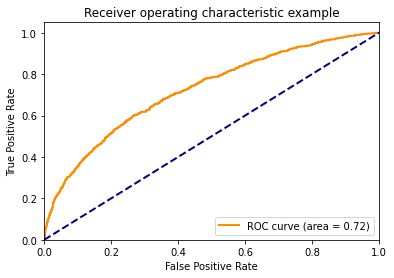

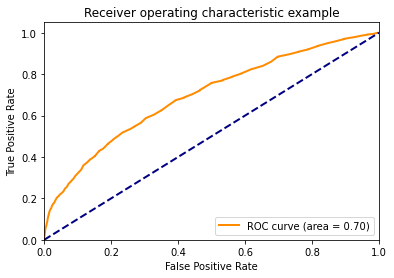

0.6951481336282938

In [351]:
roc_plot(lr, X_test, y_test)
roc_plot(rf, X_test, y_test)

In [341]:
lr.score(X_test, y_test)

0.7810235507246377

In [352]:
rf.score(X_test, y_test)

0.7735507246376812

In [344]:
class_measure(lr, X_test, y_test)

(0.7418478260869565,
 0.4652908067542214,
 0.8298507462686567,
 0.6213870961139569,
 0.7226137604659628)

In [353]:
class_measure(rf, X_test, y_test)

(0.7259963768115942,
 0.4363957597173145,
 0.8258221680876979,
 0.6003209911655852,
 0.6951481336282938)